In [1]:
import numpy as np
import datetime
import matplotlib.pylab as plt
from dataloader import DataLoader
from dataset import DataSet
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets import base
from tensorflow.python.framework import dtypes

## 数据预处理

In [2]:
# 注意tensorflow中labels组织成one_hot类型
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [3]:
def read_data_sets(train_dir,dtype=dtypes.float32):
    dl = DataLoader(train_dir)
    train_img,train_labels = dl.get_data(kind='train')
    test_img,test_labels = dl.get_data(kind='t10k')
    
    #将处理好的labels数据转换成one_hot类型
    train_labels = dense_to_one_hot(train_labels,10)
    test_labels = dense_to_one_hot(test_labels,10)
    
    options = dict(dtype = dtype)
    train = DataSet(train_img, train_labels,**options)
    test = DataSet(test_img, test_labels, **options)
    
    return base.Datasets(train = train, validation=None, test = test)

In [4]:
def show_images(Dataset,n):
    _, plts = plt.subplots(1,n,figsize=(15,15))
    for i in range(n):
        plts[i].imshow(Dataset.images[i].reshape((28,28)))
        plts[i].axes.get_xaxis().set_visible(False)
        plts[i].axes.get_yaxis().set_visible(False)
    plt.show()

In [5]:
def show_labels(Dataset, n):
    return Dataset.labels[0:n]

### 读取数据

In [6]:
mnist = read_data_sets('~/.datasets/MNIST/')

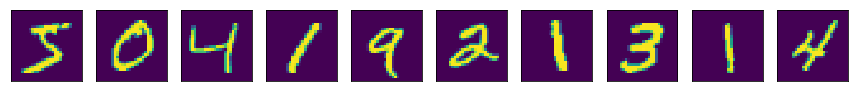

In [7]:
show_images(mnist.train,10)

In [8]:
show_labels(mnist.train,10)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
mnist.train.labels.shape

(60000, 10)

In [10]:
sess = tf.InteractiveSession()

### Model

$$\boldsymbol{\hat y} = net({\boldsymbol x}) = softmax({\boldsymbol{x}}\ {W} + {\boldsymbol{b}})$$

In [11]:
#定义计算模型
x = tf.placeholder(tf.float32,[None, 784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,w) + b)
y_ = tf.placeholder(tf.float32,[None,10])

In [12]:
#定义损失函数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [13]:
#定义优化策略
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [14]:
#初始化参数
tf.global_variables_initializer().run()

In [15]:
#训练
t1 = datetime.datetime.now()
for step in range(6000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_step.run({x:batch_xs, y_:batch_ys})
print(datetime.datetime.now()-t1)

0:00:05.667152


In [16]:
tf.argmax(y,1)

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [17]:
#估计训练效果
#这里y表示预测标签，y_表示正确标签
#tf.argmax(y,dimension) 找出相应维度最大的下标值， dimension = 0 按列查找，dimension =1 按行查找
#tf.equal（A,B）对比这两个矩阵或者向量的相等的元素，如果是相等的那就返回True，反正返回False
correct_preception = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [18]:
accuracy = tf.reduce_mean(tf.cast(correct_preception, tf.float32))

In [19]:
print accuracy.eval({x:mnist.test.images, y_:mnist.test.labels})

0.922
